# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import joblib

import warnings
warnings.filterwarnings('ignore')


# Load data

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.describe(include="O")

,Gender
count,200
unique,2
top,Female
freq,112


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

# Visualization 

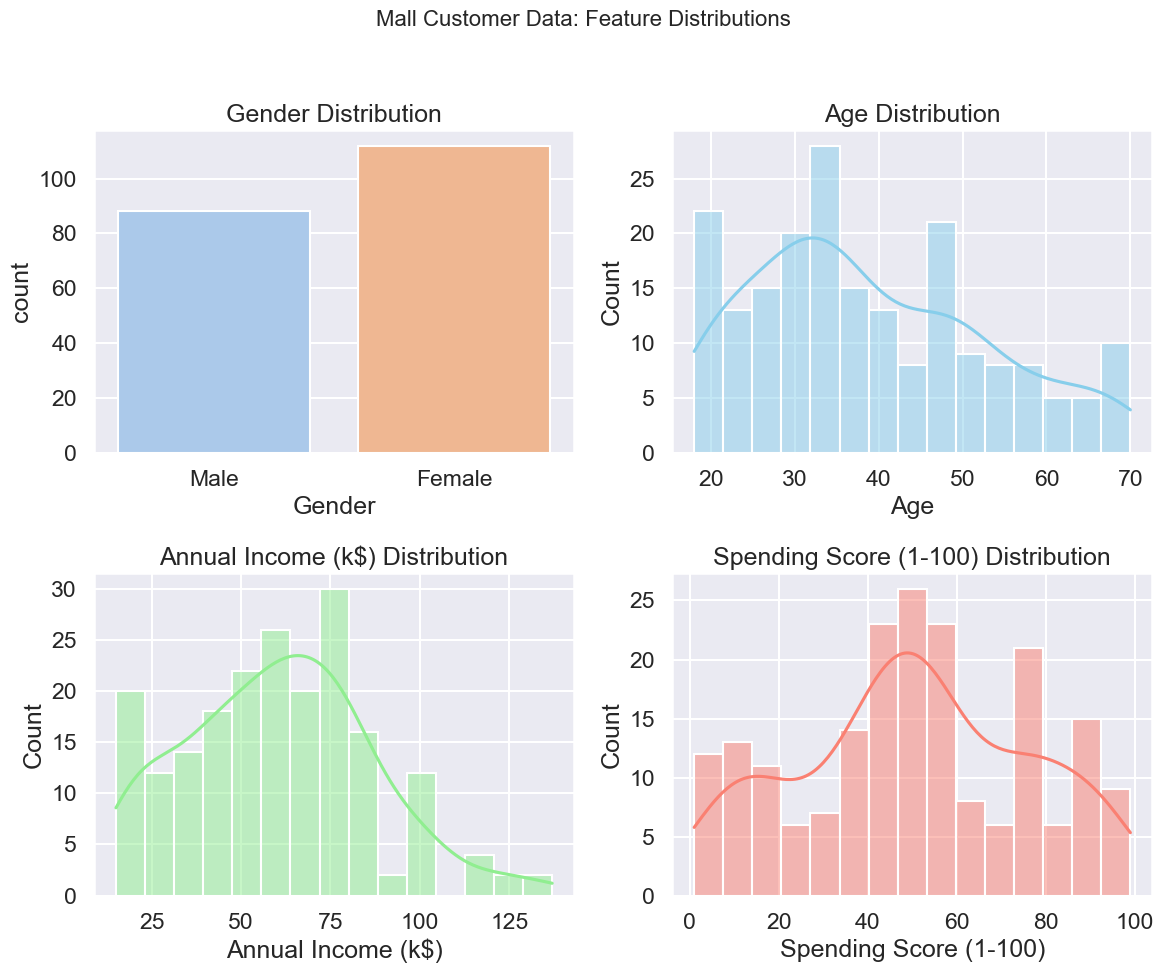

In [10]:

# Set seaborn style for aesthetics
sns.set(style='darkgrid', palette='deep', context='talk')

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Mall Customer Data: Feature Distributions', fontsize=16)

# Gender count plot
sns.countplot(x='Gender', data=df, ax=axes[0, 0],palette="pastel")
axes[0, 0].set_title('Gender Distribution')

# Age histogram
sns.histplot(df['Age'], bins=15, kde=True, ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Age Distribution')

# Annual Income histogram
sns.histplot(df['Annual Income (k$)'], bins=15, kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Annual Income (k$) Distribution')

# Spending Score histogram
sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True, ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('Spending Score (1-100) Distribution')

# Make layout tidy
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


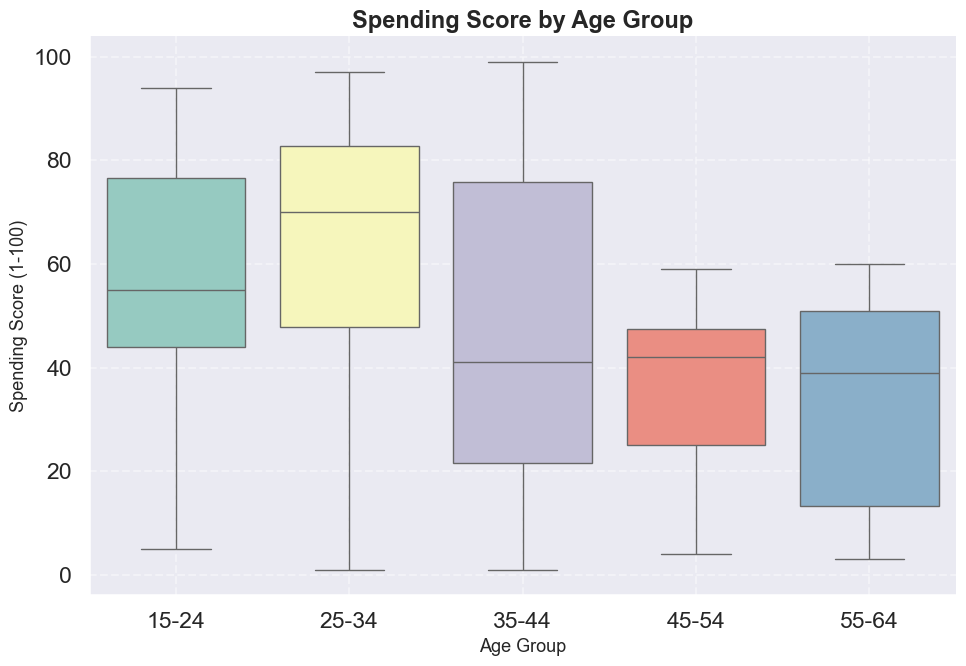

In [17]:
age_bins = [15, 25, 35, 45, 55, 65]
age_labels = ['15-24', '25-34', '35-44', '45-54', '55-64']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
plt.figure(figsize=(10, 7))
sns.boxplot(x='Age Group',y='Spending Score (1-100)',data=df,palette='Set3')
plt.title('Spending Score by Age Group', fontsize=17, fontweight='bold')
plt.xlabel('Age Group', fontsize=13)
plt.ylabel('Spending Score (1-100)', fontsize=13)
sns.despine(top=True, right=True)
plt.grid(visible=True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Select Features & Scale

In [22]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=['Income_scaled', 'Spending_scaled'])
X_scaled.head()

,Income_scaled,Spending_scaled
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


# Visual Exploration (Before Clustering)

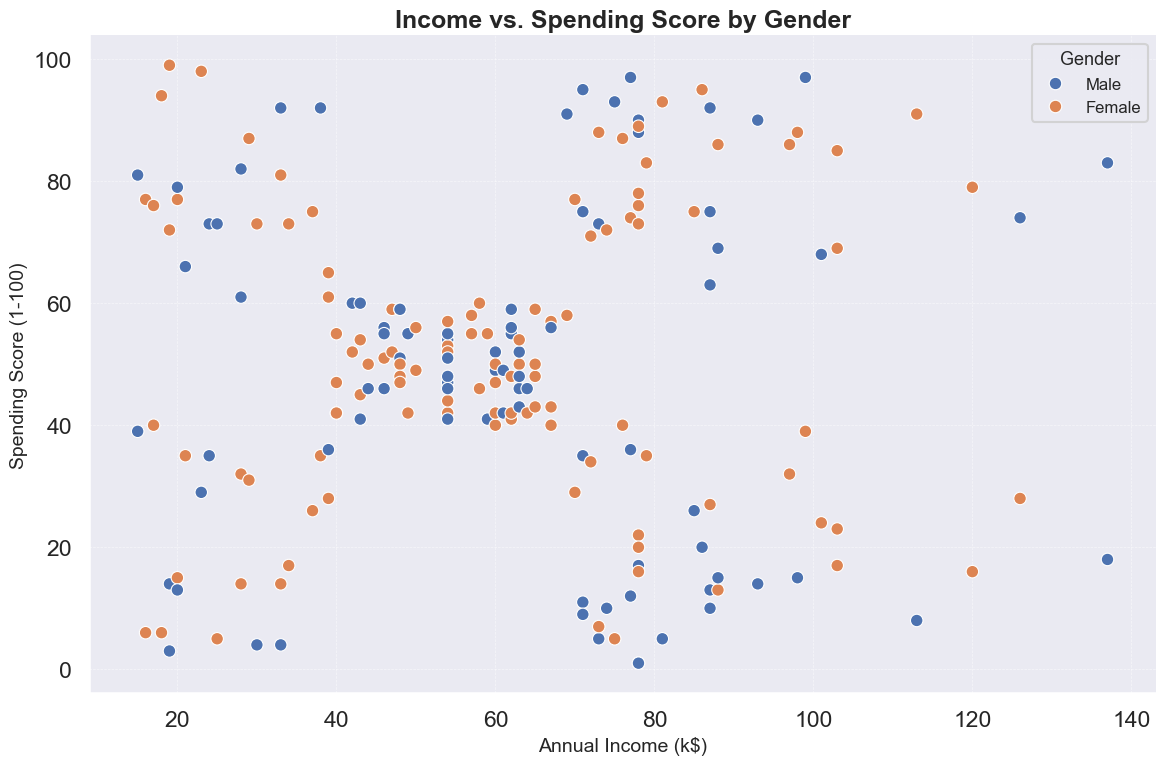

In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)',hue='Gender',palette='deep',linewidth=0.8)
plt.title('Income vs. Spending Score by Gender', fontsize=18, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(title='Gender', fontsize=12, title_fontsize=13, loc='best')
sns.despine(top=True, right=True)
plt.grid(visible=True, which='both', linestyle='--', lw=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


# Determine Optimal K (Elbow + Silhouette)

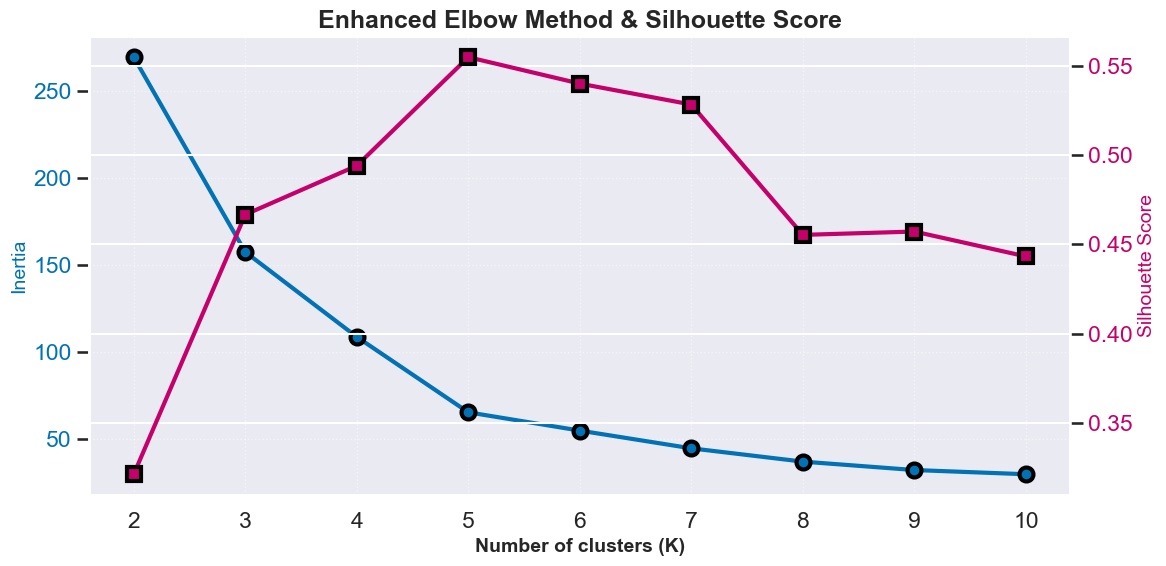

In [27]:
inertias = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))


fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(K_range, inertias, marker='o', color='#0072B5', markersize=10, markeredgewidth=3, markeredgecolor='black', linewidth=3, label='Inertia')
ax1.set_xlabel('Number of clusters (K)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Inertia', color='#0072B5', fontsize=14)
ax1.tick_params(axis='y', labelcolor='#0072B5')
ax1.grid(which='both', linestyle=':', lw=1, alpha=0.5)


ax2 = ax1.twinx()
ax2.plot(K_range, sil_scores, marker='s', color='#C6006A', 
         markersize=10, markeredgewidth=3, markeredgecolor='black', linewidth=3, label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='#C6006A', fontsize=14)
ax2.tick_params(axis='y', labelcolor='#C6006A')

plt.title('Enhanced Elbow Method & Silhouette Score', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


# Fit K-Means with Optimal K=5

In [32]:

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=['Income', 'Spending'])
centers_df

,Income,Spending
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


# Visualize K-Means Clusters

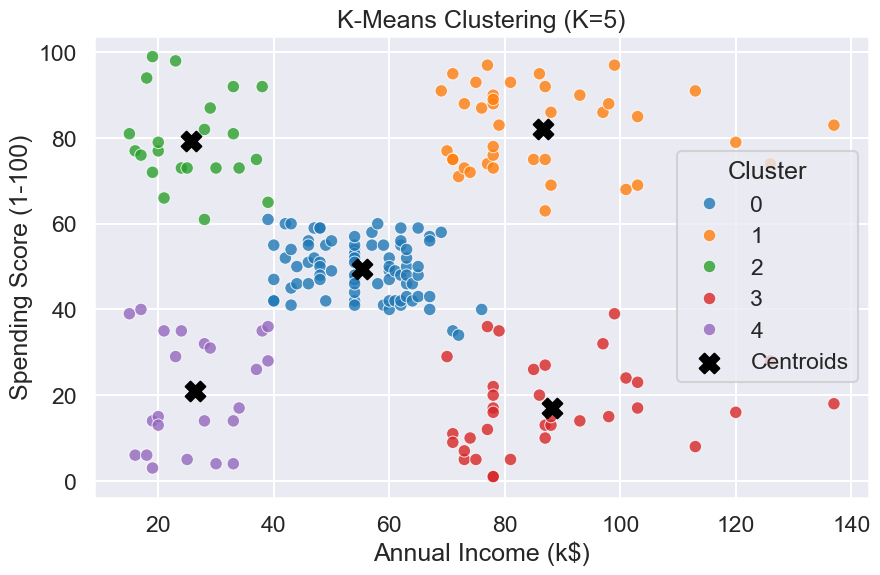

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='KMeans_Cluster', palette='tab10', s=80, alpha=0.8)
plt.scatter(centers_df['Income'], centers_df['Spending'], 
            c='black', s=200, marker='X', label='Centroids')
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.legend(title='Cluster')
plt.show()

# Average Spending per K-Means Cluster

In [34]:
cluster_stats = df.groupby('KMeans_Cluster').agg(
    Count=('CustomerID', 'count'),
    Avg_Income=('Annual Income (k$)', 'mean'),
    Avg_Spending=('Spending Score (1-100)', 'mean')
).round(2).reset_index()

cluster_stats

,KMeans_Cluster,Count,Avg_Income,Avg_Spending
0,0,81,55.30,49.52
1,1,39,86.54,82.13
2,2,22,25.73,79.36
3,3,35,88.20,17.11
4,4,23,26.30,20.91


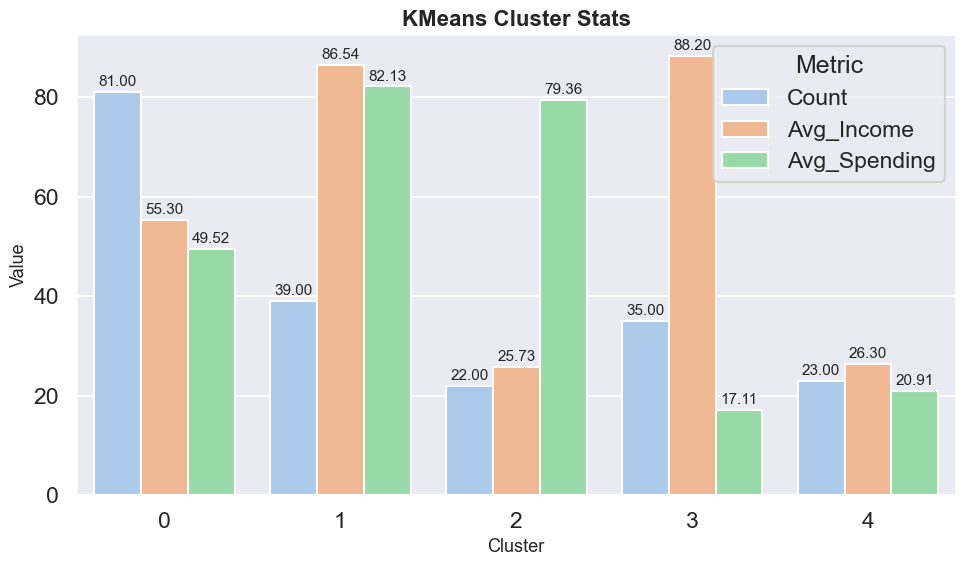

In [42]:
plot_df = cluster_stats.melt(id_vars='KMeans_Cluster', value_vars=['Count', 'Avg_Income', 'Avg_Spending'],
                             var_name='Metric', value_name='Value')
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=plot_df,x='KMeans_Cluster',y='Value',hue='Metric',palette='pastel')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=2, fontsize=11)
plt.xlabel('Cluster', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.title('KMeans Cluster Stats', fontsize=16, fontweight='bold')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


# DBSCAN

In [15]:
dbscan = DBSCAN(eps=0.4, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Stats
db_stats = df.groupby('DBSCAN_Cluster').agg(
    Count=('CustomerID', 'count'),
    Avg_Income=('Annual Income (k$)', 'mean'),
    Avg_Spending=('Spending Score (1-100)', 'mean')
).round(2).reset_index()
db_stats

,DBSCAN_Cluster,Count,Avg_Income,Avg_Spending
0,-1,15,96.13,61.80
1,0,115,48.30,51.73
2,1,11,23.73,8.91
3,2,32,80.88,83.62
4,3,27,83.93,14.44


# Visualize DBSCAN

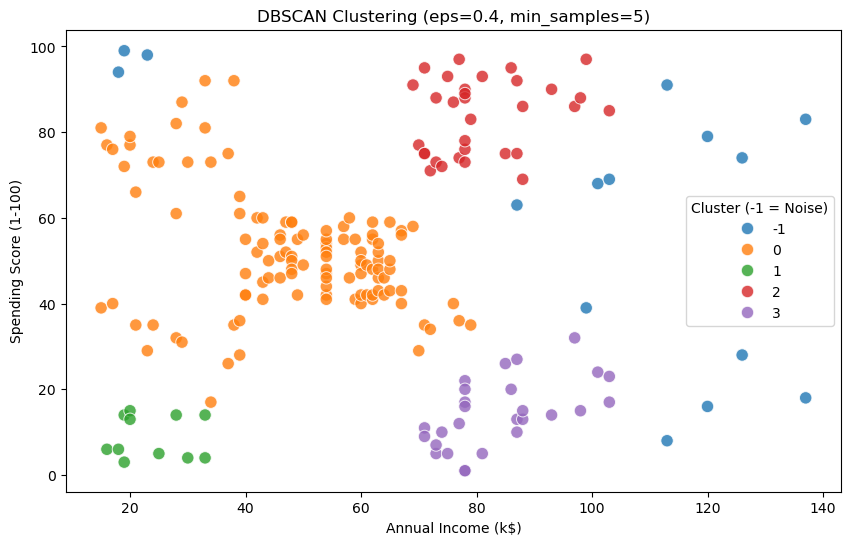

In [16]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette('tab10', n_colors=len(df['DBSCAN_Cluster'].unique()))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='DBSCAN_Cluster', palette=palette, s=80, alpha=0.8)
plt.title('DBSCAN Clustering (eps=0.4, min_samples=5)')
plt.legend(title='Cluster (-1 = Noise)')
plt.show()

# Final Summary Table

In [17]:
summary = pd.concat([
    cluster_stats.assign(Method='KMeans'),
    db_stats.assign(Method='DBSCAN')
], ignore_index=True)

summary

,KMeans_Cluster,Count,Avg_Income,Avg_Spending,Method,DBSCAN_Cluster
0,0.0,81,55.30,49.52,KMeans,NaN
1,1.0,39,86.54,82.13,KMeans,NaN
2,2.0,22,25.73,79.36,KMeans,NaN
3,3.0,35,88.20,17.11,KMeans,NaN
4,4.0,23,26.30,20.91,KMeans,NaN
5,NaN,15,96.13,61.80,DBSCAN,-1.0
6,NaN,115,48.30,51.73,DBSCAN,0.0
7,NaN,11,23.73,8.91,DBSCAN,1.0
8,NaN,32,80.88,83.62,DBSCAN,2.0
9,NaN,27,83.93,14.44,DBSCAN,3.0


# Save Models and Scaler with Joblib

In [ ]:
# Save K-Means model
joblib.dump(kmeans, 'kmeans_model.joblib')

# Save DBSCAN model
joblib.dump(dbscan, 'dbscan_model.joblib')

# Save the scaler 
joblib.dump(scaler, 'scaler.joblib')

print("Models and scaler saved successfully as .joblib files!")